Loading dataset. It might take a while ...


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.0,65.0,130.0,195.0,260.0,325.0,390.0,455.0,520.0,585.0,...,65975.0,66040.0,66105.0,66170.0,66235.0,66300.0,66365.0,66430.0,66495.0,66560.0
1,1.0,66.0,131.0,196.0,261.0,326.0,391.0,456.0,521.0,586.0,...,65976.0,66041.0,66106.0,66171.0,66236.0,66301.0,66366.0,66431.0,66496.0,66561.0
2,2.0,67.0,132.0,197.0,262.0,327.0,392.0,457.0,522.0,587.0,...,65977.0,66042.0,66107.0,66172.0,66237.0,66302.0,66367.0,66432.0,66497.0,66562.0
3,3.0,68.0,133.0,198.0,263.0,328.0,393.0,458.0,523.0,588.0,...,65978.0,66043.0,66108.0,66173.0,66238.0,66303.0,66368.0,66433.0,66498.0,66563.0
4,4.0,69.0,134.0,199.0,264.0,329.0,394.0,459.0,524.0,589.0,...,65979.0,66044.0,66109.0,66174.0,66239.0,66304.0,66369.0,66434.0,66499.0,66564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60.0,125.0,190.0,255.0,320.0,385.0,450.0,515.0,580.0,645.0,...,66035.0,66100.0,66165.0,66230.0,66295.0,66360.0,66425.0,66490.0,66555.0,66620.0
61,61.0,126.0,191.0,256.0,321.0,386.0,451.0,516.0,581.0,646.0,...,66036.0,66101.0,66166.0,66231.0,66296.0,66361.0,66426.0,66491.0,66556.0,66621.0
62,62.0,127.0,192.0,257.0,322.0,387.0,452.0,517.0,582.0,647.0,...,66037.0,66102.0,66167.0,66232.0,66297.0,66362.0,66427.0,66492.0,66557.0,66622.0
63,63.0,128.0,193.0,258.0,323.0,388.0,453.0,518.0,583.0,648.0,...,66038.0,66103.0,66168.0,66233.0,66298.0,66363.0,66428.0,66493.0,66558.0,66623.0


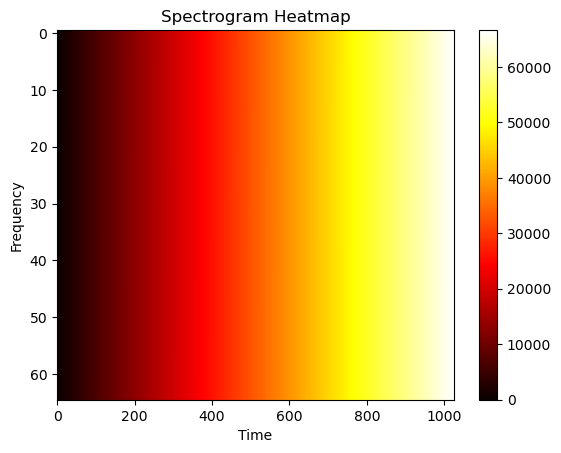

In [8]:
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import argparse
import os
import tempfile

from network import NAF
from modules import embedding_module_log
from sound_loader import sound_samples

# Arguments handling
#parser = argparse.ArgumentParser()
#parser.add_argument("config_file", type=str, help="Path to the model's configuration file")
#parser.add_argument("save_image", type=bool, help="A flag that controls whether or not the image gets saved")
#args = parser.parse_args()

config_file = "saved/net_20230729_152034_loss_0.0442.pth"
# Device selection
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Dataset
print('Loading dataset. It might take a while ...')
dataset = sound_samples(num_samples=20)

s = 12
m = 30
sample = dataset.spectrograms[s,m,:]
src = dataset.posSrc[s, :]
mic = dataset.posMic[m, :]

src_norm = ((src - dataset.min_pos)/(dataset.max_pos-dataset.min_pos) - 0.5) * 2.0
mic_norm = ((mic - dataset.min_pos)/(dataset.max_pos-dataset.min_pos) - 0.5) * 2.0

src_norm = torch.tensor(src_norm).to(device).float()
mic_norm = torch.tensor(mic_norm).to(device).float()

# Spawn embedders and move to GPU
xyz_embedder = embedding_module_log(num_freqs=7, ch_dim=0, max_freq=7).to(device)
freq_embedder = embedding_module_log(num_freqs=7, ch_dim=1).to(device)
time_embedder = embedding_module_log(num_freqs=7, ch_dim=1).to(device)

# Load NAF with selected configuration
net = NAF(input_dim = 248, min_xy=dataset.min_pos[:2], max_xy=dataset.max_pos[:2]).to(device)
state_dict = torch.load(config_file)
net.load_state_dict(state_dict)
net.eval()

test = np.arange(1025*65).reshape(1025, 65)
#Run in inference
#with torch.no_grad():

#    src_embed = xyz_embedder(src_norm).unsqueeze(0).unsqueeze(1).repeat(1025, 65, 1)
#    mic_embed = xyz_embedder(mic_norm).unsqueeze(0).unsqueeze(1).repeat(1025, 65, 1)
    
#    for f in range(1025):
#        for t in range(65):
#            test[f,t]=i
#            i=i+1
            
#    print(src_embed)
#    print(mic_embed)
#    f = torch.arange(1025).unsqueeze(1).to(device)/1024
#    print(f)
#    t = torch.arange(65).unsqueeze(1).to(device)/64
#    print(t)
#
#    freq_embed = freq_embedder(f).unsqueeze(1).repeat(1,65,1)
#    print(freq_embed,freq_embed.shape)
#    time_embed = time_embedder(t).unsqueeze(0).repeat(1025,1,1)
#    print(time_embed, time_embed.shape)
#
#    input = torch.concatenate((src_embed, mic_embed, freq_embed, time_embed), dim=2)
#    input = input.to(device).float()
#
#    output = net(input, src_norm.unsqueeze(0).unsqueeze(1).repeat(1025,1,3), mic_norm.unsqueeze(0).unsqueeze(1).repeat(1025,1,3))
#    output = output.cpu()
#    output = (output * dataset.std_deviation)+dataset.mean_value
df = pd.DataFrame(test)
from IPython.display import display
display(df)
# Generate and save image to temp directory
plt.imshow(test, cmap='hot', aspect='auto')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram Heatmap')
plt.show()